In [3]:
# third part imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# flow those tensors 
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# make it pretty
plt.style.use('seaborn-whitegrid')

In [9]:
df = pd.read_csv('data/seattle_911_timeseries.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5815 entries, 0 to 5814
Data columns (total 4 columns):
date                      5815 non-null object
incident_count            5815 non-null int64
detrended_count           5815 non-null float64
detrended_scaled_count    5815 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 181.8+ KB


In [13]:
df.head()

,date,incident_count,detrended_count,detrended_scaled_count
0,2003-11-07,199,-2.634516,0.416508
1,2003-11-08,254,52.351571,0.593857
2,2003-11-09,240,38.337659,0.548657
3,2003-11-10,239,37.323746,0.545387
4,2003-11-11,179,-22.690166,0.351822


In [14]:
def make_training_data(series, n_x, n_y):
    x = None
    y = None
    i = 0
    while i + n_x + n_y < series.shape[0]:
        if i == 0:
            x = series[i: i + n_x].values
            y = series[i + n_x: i + n_x + n_y].values
        else:
            x = np.vstack([x, series[i: i + n_x].values])
            y = np.vstack([y, series[i + n_x: i + n_x + n_y]])
        i += 1
    return x, y

In [17]:
def plot_rnn_output(x, y, i, y_lim=1.0):
    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    axs[0].set_xlim((0, x.shape[1] + y.shape[1] - 1))
    axs[1].set_xlim(0, y.shape[1] - 1)
    axs[0].plot(
        x[0], 
        label='Input data', 
        color='dodgerblue',
        linewidth=1)
    axs[0].plot(
        range(x.shape[1], x.shape[1] + y.shape[1]),
        model.predict(x[i].reshape(1, x[i].shape[0], 1))[0], 
        label='Estimated result',
        color='orange',
        linewidth=1)
    axs[0].plot(
        range(x.shape[1], x.shape[1] + y.shape[1]),
        y[i], 
        label='True result',
        color='limegreen',
        linewidth=1)
    axs[1].plot(
        model.predict(x[i].reshape(1, x[i].shape[0], 1))[0], 
        label='Estimated result',
        color='orange')
    axs[1].plot(
        y[i], 
        label='True result',
        color='limegreen');

In [33]:
x, y = make_training_data(df['detrended_scaled_count'], 21, 7)

In [34]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [35]:
np.random.seed(97)
test_mask = np.random.choice([False, True], x.shape[0], p=[0.75, 0.25])
train_mask = np.invert(test_mask)

In [36]:
x_train = x[train_mask, :]
x_test = x[test_mask, :]
y_train = y[train_mask, :]
y_test = y[test_mask, :]

In [51]:
adam = Adam(learning_rate=0.01)

model = Sequential()
model.add(LSTM(
    10, 
    activation='sigmoid', 
    input_shape=(x.shape[1], x.shape[2])))
model.add(Dense(y.shape[1]))
model.compile(optimizer=adam, loss='mse')

In [73]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=1000, 
    batch_size=256, 
    verbose=1, 
    validation_data=(x_test, y_test), 
    shuffle=True
)

Train on 4273 samples, validate on 1514 samples
Epoch 1/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 2/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 3/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 4/1000
4273/4273 [==============================] - 0s 45us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 5/1000
4273/4273 [==============================] - 0s 45us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 6/1000
4273/4273 [==============================] - 0s 48us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 7/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 8/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 9/1000
4273/4273 [==============================] - 0s 48us/sample - loss: 0.0057 - val_lo

4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 77/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 78/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 79/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 80/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 81/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 82/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 83/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 84/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 85/1000
4273/4273 [=================

4273/4273 [==============================] - 0s 48us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 152/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 153/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 154/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 155/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 156/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 157/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 158/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 159/1000
4273/4273 [==============================] - 0s 54us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 160/1000
4273/4273 [========

4273/4273 [==============================] - 0s 47us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 227/1000
4273/4273 [==============================] - 0s 45us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 228/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 229/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 230/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 231/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 232/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 233/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 234/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 235/1000
4273/4273 [========

4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0061
Epoch 302/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 303/1000
4273/4273 [==============================] - 0s 40us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 304/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 305/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 306/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 307/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 308/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 309/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 310/1000
4273/4273 [========

4273/4273 [==============================] - 0s 46us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 377/1000
4273/4273 [==============================] - 0s 54us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 378/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 379/1000
4273/4273 [==============================] - 0s 53us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 380/1000
4273/4273 [==============================] - 0s 50us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 381/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 382/1000
4273/4273 [==============================] - 0s 50us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 383/1000
4273/4273 [==============================] - 0s 45us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 384/1000
4273/4273 [==============================] - 0s 52us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 385/1000
4273/4273 [========

4273/4273 [==============================] - 0s 47us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 452/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 453/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 454/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 455/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 456/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 457/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 458/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 459/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 460/1000
4273/4273 [========

4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 527/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 528/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0056 - val_loss: 0.0063
Epoch 529/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 530/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 531/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 532/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 533/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 534/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 535/1000
4273/4273 [========

4273/4273 [==============================] - 0s 45us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 602/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 603/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 604/1000
4273/4273 [==============================] - 0s 49us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 605/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 606/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 607/1000
4273/4273 [==============================] - 0s 47us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 608/1000
4273/4273 [==============================] - 0s 47us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 609/1000
4273/4273 [==============================] - 0s 45us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 610/1000
4273/4273 [========

4273/4273 [==============================] - 0s 46us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 677/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 678/1000
4273/4273 [==============================] - 0s 47us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 679/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 680/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 681/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 682/1000
4273/4273 [==============================] - 0s 47us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 683/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 684/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0056 - val_loss: 0.0063
Epoch 685/1000
4273/4273 [========

4273/4273 [==============================] - 0s 44us/sample - loss: 0.0056 - val_loss: 0.0063
Epoch 752/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 753/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 754/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 755/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 756/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 757/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 758/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 759/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 760/1000
4273/4273 [========

4273/4273 [==============================] - 0s 45us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 827/1000
4273/4273 [==============================] - 0s 41us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 828/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 829/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 830/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 831/1000
4273/4273 [==============================] - 0s 47us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 832/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 833/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 834/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 835/1000
4273/4273 [========

4273/4273 [==============================] - 0s 48us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 902/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 903/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 904/1000
4273/4273 [==============================] - 0s 47us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 905/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0057 - val_loss: 0.0063
Epoch 906/1000
4273/4273 [==============================] - 0s 45us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 907/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 908/1000
4273/4273 [==============================] - 0s 45us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 909/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 910/1000
4273/4273 [========

4273/4273 [==============================] - 0s 46us/sample - loss: 0.0056 - val_loss: 0.0063
Epoch 977/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0057 - val_loss: 0.0062
Epoch 978/1000
4273/4273 [==============================] - 0s 45us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 979/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 980/1000
4273/4273 [==============================] - 0s 44us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 981/1000
4273/4273 [==============================] - 0s 43us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 982/1000
4273/4273 [==============================] - 0s 49us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 983/1000
4273/4273 [==============================] - 0s 42us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 984/1000
4273/4273 [==============================] - 0s 46us/sample - loss: 0.0056 - val_loss: 0.0062
Epoch 985/1000
4273/4273 [========

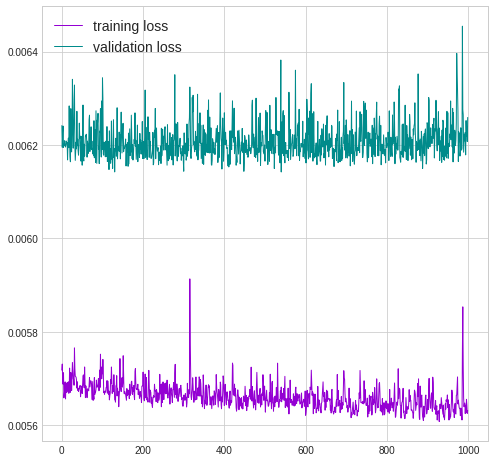

In [74]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], color='darkviolet', linewidth=1, label='training loss')
plt.plot(history.history['val_loss'], color='darkcyan', linewidth=1, label='validation loss')
plt.legend(fontsize=14);

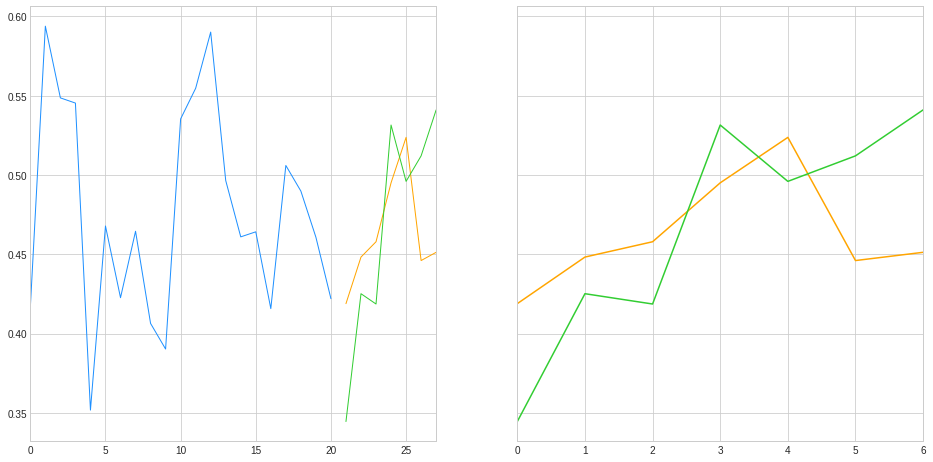

In [79]:
plot_rnn_output(x_test, y_test, 0)

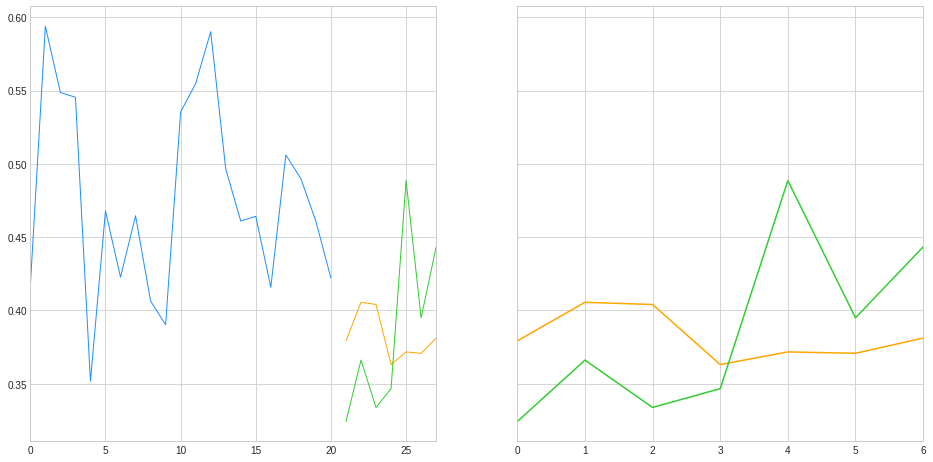

In [80]:
plot_rnn_output(x_test, y_test, 500)

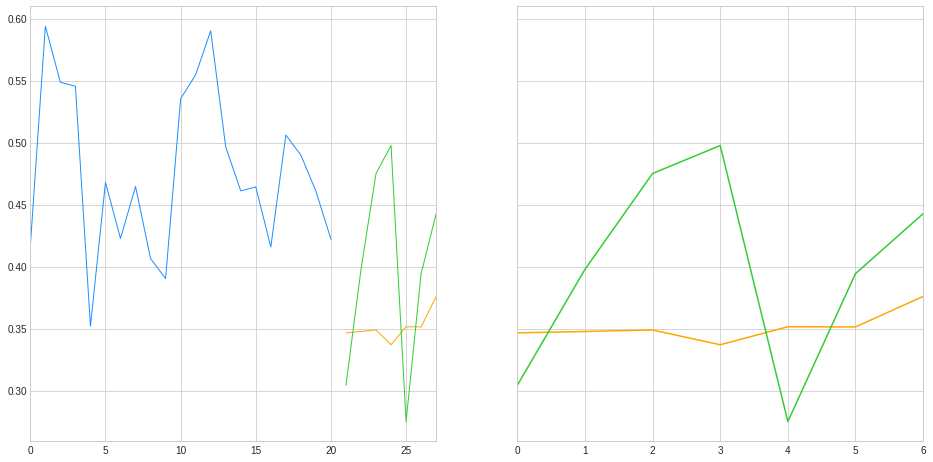

In [81]:
plot_rnn_output(x_test, y_test, 1000)

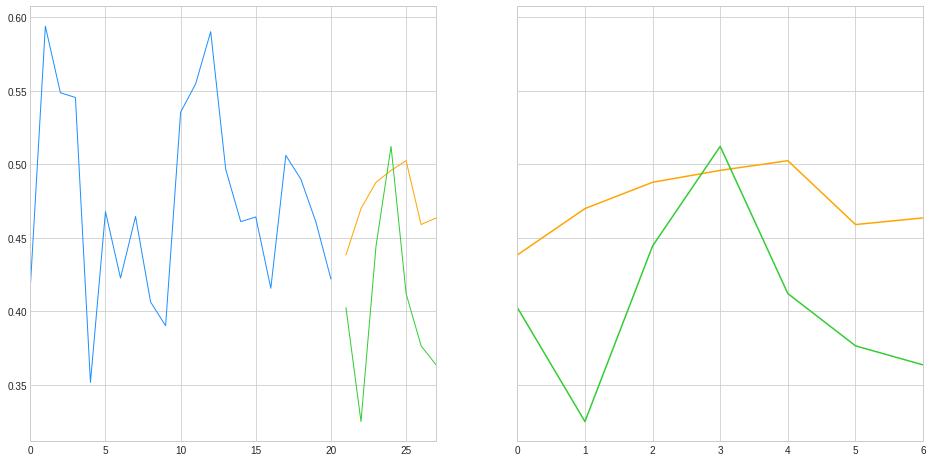

In [82]:
plot_rnn_output(x_test, y_test, 1500)